# House Prediction 

## Introduction

Developing an ML model that will be used to predict the price of houses based on some given features of the house


## Roadmap

- Importing libraries
- importing data from the sklearn.datasets
- Visualizing the data
- Data cleaning
- Feature engineering or preprocessing
- Feature scaling using z-score normalization
- Visualizing the data as a graph
- Computing cost 
- Computing gradient
- computing gradient descent and regularization
- Plotting and analyzing the cost function
- Finding the weight for each feature and the bias
- Plotting and analyzing the predictions made by the parameters
- Finding the accuracy of the pamaters
- Making predictions using the parameters

## Importing libraries

- Numpy
- matplotlib.pyplot
- Helper functions from the course resources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from lab_utils_common import dlc
from sklearn.datasets import fetch_california_housing

## Loading the data 

- Loads the training data from sklearn.datasets

In [5]:
#Loads the entire housing data from sklearn datasets
california = fetch_california_housing()
#Copies the data in the features into x_train
X_train = california.data
y_train = california.target
X_features = california.feature_names
#Outputs the shape of the features of the training data
print(f'The shape of the features training data is {X_train.shape}')
#Ouputs the shape of the target of the training data
print(f'The shape of the targets training data is {y_train.shape}')
#Outpust the shape of the feature_names
print(f'The shape of the feature names of the training data is {len(X_features)}')
#print(X_train)
#print(y_train)
print(f'The features for the California House Prediction model are: \n {X_features}')

The shape of the features training data is (20640, 8)
The shape of the targets training data is (20640,)
The shape of the feature names of the training data is 8
The features for the California House Prediction model are: 
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Displaying the first training example and the target value in the training data 

Shows the first training example and the target value

In [17]:
# First traing example
print(f'The first training example is shown below: \n {X_train[0]}')
print(f'The shape of the first training example is {X_train[0].shape}')

#Target value for the first training example
print(f'\nThe target value for the first training example is {y_train[0]}')

The first training example is shown below: 
 [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
The shape of the first training example is (8,)

The target value for the first training example is 4.526


## Visualizing the data 

- Plot each of the features and visualize how it varries with the price of the house 
- TODO: Write the function on my own and import it here rather

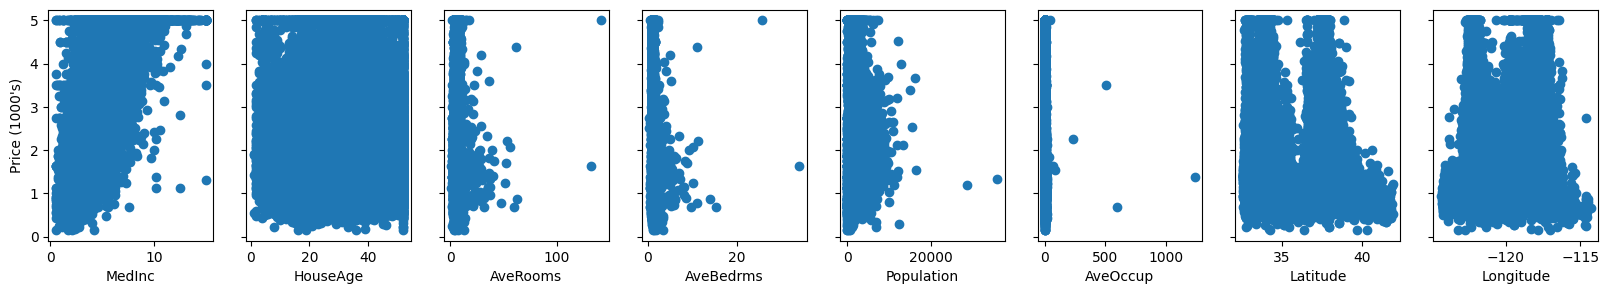

In [10]:
fig,ax = plt.subplots(1, 8, figsize=(20, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

### Brief description of the data 

- The AveOccup feature has little influence on the price of houses 

## Feature scaling or Normalization using z-score normalization

- This scales all the features so none of them has a greater influence on the price of the house than others
- Feature scaling or normalization helps gradient descent to converge early since all the features will be approaching the thier weights that gives the least cost function

- X_scaled = (x_i - mean) / standard_deviation

## Numpy mean and standard deviation intuition

- Provides an intuition of numpy's mean and standard deviation
- These will used to calculate the z-score normslization

In [18]:
#Lets have a bit of intuition of how np.mean and np.std work
#Selects two columns/features of the X_train data
X_train_2_features = X_train[:,[0,2]]
#print(X_train_2_features)
print(f'The shape of the slected features is {X_train_2_features.shape}')
#Calculates the mean of each feature of the training example
mu = np.mean(X_train_2_features, axis=0)
print(f'Mean {mu}')
print(f'The shape of the mu of the two features is {mu.shape}')

#Calculates the standard of each columnm/feature of the training example 
sigma = np.std(X_train_2_features, axis=0)
print(f'The standard deviation is {sigma}')
print(f'The shape of the sigma of the two features is {sigma.shape}' )

The shape of the slected features is (20640, 2)
Mean [3.870671   5.42899974]
The shape of the mu of the two features is (2,)
The standard deviation is [1.89977569 2.4741132 ]
The shape of the sigma of the two features is (2,)


## Calculating the z-score normalization

- Defines a function that calculates the z-score normalization 


In [19]:
#Function that uses z-score normalization to scale the features
def zscore_normalize_features(X):
    #Find the mean of each column/feature
    mu = np.mean(X, axis=0)     #mu returns an array of size (n,)
    
    #Finds the stanadard deviation of each column/feature
    sigma = np.std(X, axis=0)    #sigma an array of size (n,)
    
    #Element-wise, subtract the mu for each column from each example and divide by the standard dev for that col
    X_norm = (X - mu) / sigma
    
    return (X_norm, mu, sigma)

## Visualizing the steps in z-score normalization

This gives an intuition of the processes in z-score normalization and how each step scales the features/columns \
 Demonstrates how two features vary in the 
- unnormalized form
- X - mean form
- normalized form 

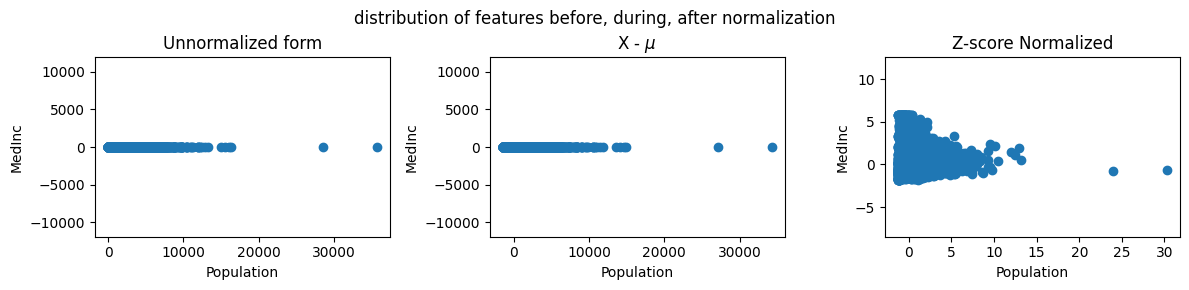

In [24]:
#Calculates the mean of each feature
mu = np.mean(X_train, axis=0)

#Calculates the standard deviation of each feature
sigma = np.std(X_train, axis=0)

#Subtracts the mean of each cell from the mean of the column
X_mean = (X_train - mu)

#Calculates the z-score normalization
X_norm = (X_train - mu) / sigma

#Plots two features to visualize how they vary 
fig, ax = plt.subplots(1, 3, figsize=(12,3))

#Plots the graph of the unnormalized version of two features of the training data
ax[0].scatter(X_train[:,4], X_train[:,0])
ax[0].set_xlabel(X_features[4]); ax[0].set_ylabel(X_features[0])
ax[0].set_title('Unnormalized form')
ax[0].axis('equal')

#Plots the graph of the X - mu version of the two features of the training data
ax[1].scatter(X_mean[:,4], X_mean[:,0])
ax[1].set_xlabel(X_features[4]); ax[1].set_ylabel(X_features[0])
ax[1].set_title(r'X - $\mu$')
ax[1].axis('equal')

#Plots the graph of the z-score normalized version of the two features of the training data 
ax[2].scatter(X_norm[:,4], X_norm[:,0])
ax[2].set_xlabel(X_features[4]); ax[2].set_ylabel(X_features[0])
ax[2].set_title('Z-score Normalized')
ax[2].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

## Normalizing the features/columns

Calls the function that computes the z-score normalization of the features to scale the features

In [25]:
#Calls the function that computes the z-score normalization of the features
X_norm, mu, sigma = zscore_normalize_features(X_train)
#print(f'The normalized data is \n {X_norm}')
print(f'The shape of the normalized training data is {X_norm.shape}')

The shape of the normalized training data is (20640, 8)


## Checks the min and max number for each feature

This checks the minimum and maximum number for each feature after standardization

In [43]:
# Outputs the minimum value of each feature in the traing example
print('The minimum value for each feature in the training data is :')
X_norm.min(axis=0)

The minimum value for each feature in the training data is :


array([-1.77429947, -2.19618048, -1.8523186 , -1.61076772, -1.25612255,
       -0.22899997, -1.447568  , -2.38599234])

In [44]:
# Outputs the maximum value of each feature in the training example
print('The maximum value for each feature in the training data is: ')
X_norm.max(axis=0)

The maximum value for each feature in the training data is: 


array([  5.85828581,   1.85618152,  55.16323628,  69.57171326,
        30.25033022, 119.41910319,   2.95806762,   2.62528006])

## Computing cost

This implements a function that calculates the cost of the model based on the weight and bias
The cost function is regularized to prevent overfitting by panalizing each weight

In [45]:
#Function that calculates the cost of our models prediction based on the weight(w) and bias(b)
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        f_wb = (f_wb_i - y[i])**2
        cost = cost + f_wb
        
    total_cost = (1/2*m) * cost
    return total_cost  

## Testing the cost function implementation

This calls the cost function with arbitrary weights for each feature and a bias

In [46]:
#Calls the compute cost function and outpust the results
w_norm = np.zeros(X_train.shape[1])
b_norm = 0.2
#print(w)
cost = compute_cost(X_train,y_train, w_norm, b_norm)
print(cost)

1027334916.0655363


## Plots the predicted values against the target values

This plots our predicted values using weight of zeros and a bias of 0.2

A representation of how the cost function results in a great value

In [ ]:
#Calulates the our models prediction using the assumed weights and bias 
m,n = X_train.shape
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_train[i],w_norm) + b_norm
    
#Plot predictions versus original values against features
fig, ax = plt.subplots(1,13, figsize = (12,3), sharey = True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,1], y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel('Price'); ax[0].legend()
fig.suptitle('Target versus Prediction using random weight and bias')

The graphical representation of the predicted and target values above shows why the cost function yields a very big number is the error in the predicted values and the target values are very wide

## Compute gradient 

This computes the gradient of the weight that leads it to the local minima

In [ ]:
#Function that computes the gradient of each feature
def gradient_function(X, y, w, b):
    m,n = X.shape
    
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        f_wb = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (f_wb * X[i,j])
            
        dj_db = dj_db + f_wb
        
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    
    return dj_dw, dj_db

## Testing the gradient function

This test the gradient implementation

In [ ]:
#w = np.zeros(X_train.shape[1])
#b = 0.2
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value
w = 0
b = 0

dj_dw, dj_db = gradient_function(x_train, y_train, w, b)

#dj_dw, dj_db = gradient_function(X_train, y_train, w, b)

print(f'The gradient for the weight is \n {dj_dw} and the bias is \n {dj_db}')